<a href="https://colab.research.google.com/github/jewoolee0502/ComputerVision/blob/main/ECSE415_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECSE 415: Introduction to Computer Vision


##Assignment 1: Image Filtering

###Library Requirements

In [53]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Path

In [54]:
img_path = '/content/drive/MyDrive/McGill/2025/Fall 2025/ECSE 415/A1/quebec_city.png'

###1. Image Basics

####1.1 Import and document your image

Image height: 680
Image width: 1209
Image channels: 3


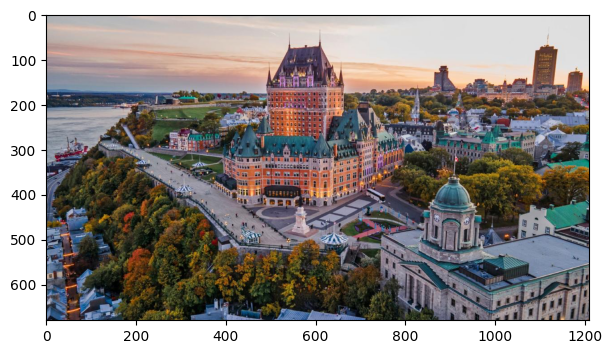

In [55]:
img = cv2.imread(img_path)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.imshow(img_color)

height, width, channels = np.shape(img)
print("Image height:", height)
print("Image width:", width)
print("Image channels:", channels)

*For my image only: quebec_city.png

| Index | Dimension | Value |
|-------|-----------|-------|
|   0   |   Height  |  680 |
|   1   |   Width   |  1209 |
|   2   |  Channel  |   3   |

####1.2  Implement grayscale conversion from scratch

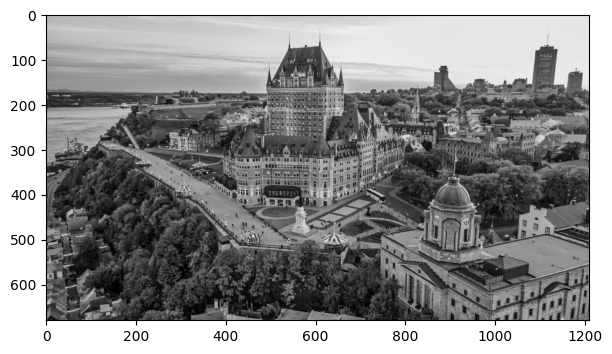

In [56]:
def to_grayscale(img):
  if img.ndim != 3:
    return ValueError("Input image must be 3-dimensional")

  original_dtype = img.dtype
  img = img.astype(np.float32)

  # normalizing the values: [0, 1] float
  if original_dtype == np.uint8 or img.max() > 1.0:
    img /= 255.0

  # Luminance-weighted formula: Y = 0.299 R + 0.587 G + 0.114 B
  img_gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

  if original_dtype == np.uint8:
    return (img_gray * 255.0).astype(np.uint8) # reverting back to original
  else:
    return img_gray

img_gray = to_grayscale(img_color)

plt.figure(figsize=(7,7))
plt.imshow(img_gray, cmap='gray')

####1.3 Resize your image

Gray Image height: 680
Gray Image width: 1209
Resized Image height: 288
Resized Image width: 512


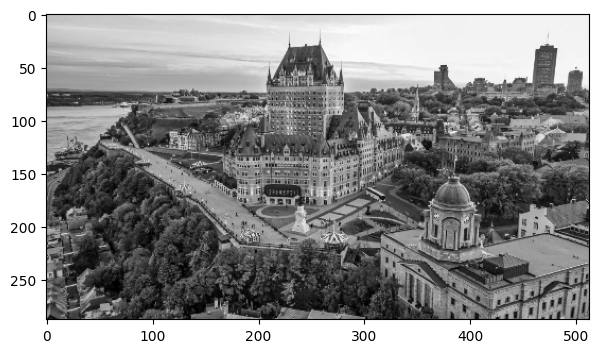

In [57]:
def resize_img(img):
  max_dim = 512
  H,W = img.shape[:2]

  # calculating the ratio
  if H > W:
    scale = max_dim / H
  else:
    scale = max_dim / W

  new_H = int(np.round(H * scale))
  new_W = int(np.round(W * scale))

  return cv2.resize(img, (new_W, new_H))

img_resized = resize_img(img_gray)

plt.figure(figsize=(7,7))
plt.imshow(img_resized, cmap='gray')

height_gray, width_gray = img_gray.shape
height_resized, width_resized = img_resized.shape

print("Gray Image height:", height_gray)
print("Gray Image width:", width_gray)
print("Resized Image height:", height_resized)
print("Resized Image width:", width_resized)

*For my image only: quebec_city.png

| Label | Gray | Resized |
|-------|-----------|-------|
|   Height   |   680  |  288 |
|   Width   |   1209   |  512 |

####1.4 Display results

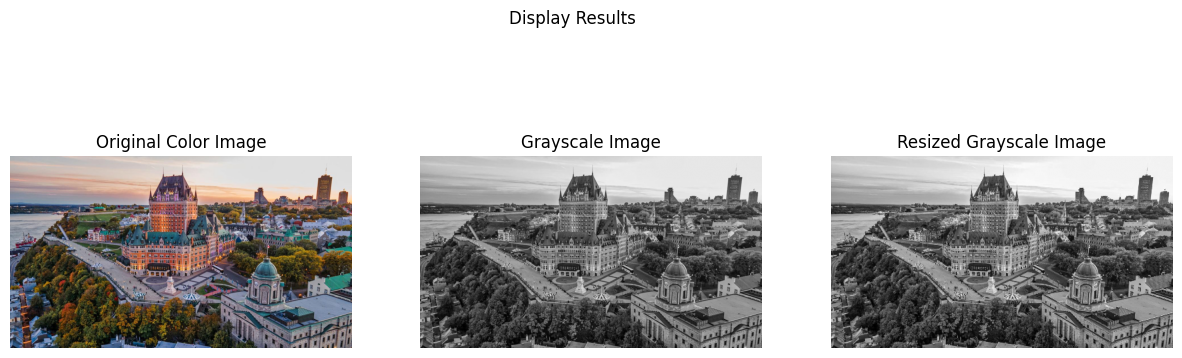

In [58]:
# Displaying 3 images side by side

fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Display Results")

axes[0].imshow(img_color)
axes[0].set_title("Original Color Image")
axes[0].axis("off")

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(img_resized, cmap='gray')
axes[2].set_title("Resized Grayscale Image")
axes[2].axis("off")

plt.show()

###2. Image Filtering

####2.1 Use your grayscale image from Part 1 as input

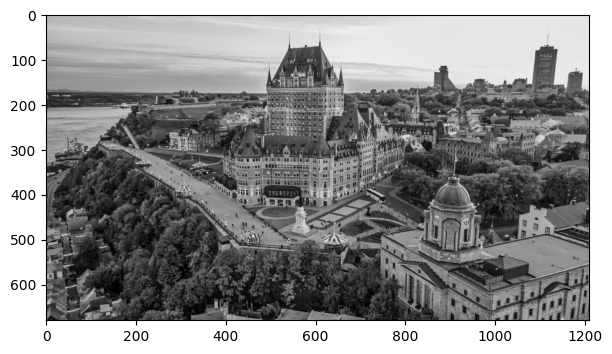

In [59]:
# Using the grayscale function I implemented in part 1

img_gray = to_grayscale(img_color)

plt.figure(figsize=(7,7))
plt.imshow(img_gray, cmap='gray')

####2.2 Implement Gaussian Filtering

In [60]:
# Implementation of Gaussian Filter Function

def gaussian_kernel(size, sigma):
  kernel = np.zeros((size, size))
  center = size // 2

  # gaussian kernel
  for i in range(size): # rows
    for j in range(size): # columns
      x = i - center
      y = j - center
      kernel[i, j] = (1/(2 * np.pi * np.square(sigma))) * np.exp(-(np.square(x) + np.square(y))/(2 * np.square(sigma)))

  kernel /= np.sum(kernel) # normalization
  return kernel

def convolution(image, kernel):
  H, W = image.shape
  kernel_H, kernel_W = kernel.shape
  padding_H, padding_W = kernel_H // 2, kernel_W // 2

  # output array
  output = np.zeros_like(image).astype(np.float32)

  # zero padding -> image padding with zeros
  padded_image = np.pad(image, ((padding_H, padding_H), (padding_W, padding_W)), mode='constant')

  # convolution
  for i in range(H):
    for j in range(W):
      output[i, j] = np.sum(padded_image[i:i+kernel_H, j:j+kernel_W] * kernel)

  return output

def gaussian_filter(image, kernel_size, sigma):
  kernel = gaussian_kernel(kernel_size, sigma)
  return convolution(image, kernel)

In [61]:
# Testing

my_kernel = gaussian_kernel(3, 1)
print("My kernel: \n", my_kernel)

cv2_kernel_1D = cv2.getGaussianKernel(3, 1)
cv2_kernel = cv2_kernel_1D * cv2_kernel_1D.T
print("cv2 kernel: \n", cv2_kernel)

diff = np.abs(my_kernel - cv2_kernel)
print("Difference: \n", diff)

My kernel: 
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
cv2 kernel: 
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
Difference: 
 [[1.38777878e-17 0.00000000e+00 1.38777878e-17]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.38777878e-17 0.00000000e+00 1.38777878e-17]]


(np.float64(-0.5), np.float64(1208.5), np.float64(679.5), np.float64(-0.5))

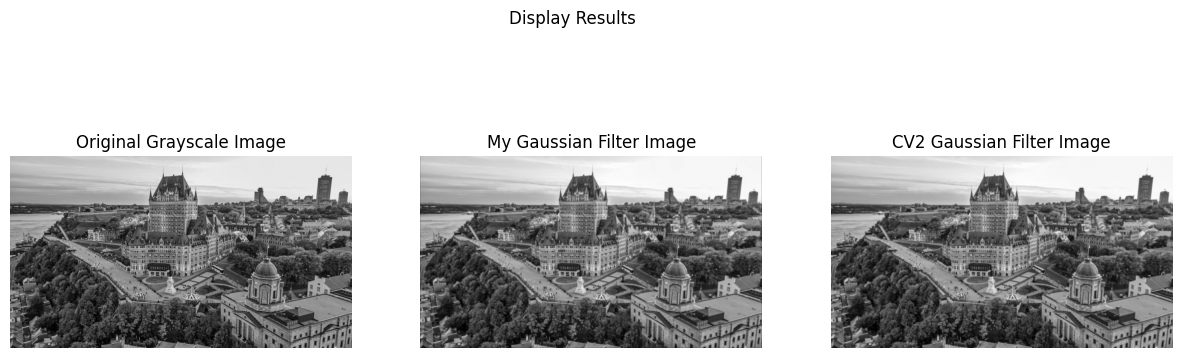

In [62]:
# Displaying the images

my_gaussian_filter = gaussian_filter(img_gray, 5, 1)
cv2_gaussian_filter = cv2.GaussianBlur(img_gray, (5, 5), 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Display Results")

# original grayscale image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

# my gaussian filter image
axes[1].imshow(my_gaussian_filter, cmap='gray')
axes[1].set_title("My Gaussian Filter Image")
axes[1].axis("off")

# cv2 gaussian filter image
axes[2].imshow(cv2_gaussian_filter, cmap='gray')
axes[2].set_title("CV2 Gaussian Filter Image")
axes[2].axis("off")

####2.3 Implement Median Filtering

In [63]:
# Implementation of Median Filtering

def median_filter(image, kernel_size):
  H, W = image.shape
  padding_H, padding_W = kernel_size // 2, kernel_size // 2

  # output array
  output = np.zeros_like(image).astype(np.float32)

  # zero padding -> image padding with zeros
  padded_image = np.pad(image, ((padding_H, padding_H), (padding_W, padding_W)), mode='constant')

  # median filtering -> replacing the center with the median
  for i in range(H):
    for j in range(W):
      output[i, j] = np.median(padded_image[i:i+kernel_size, j:j+kernel_size])

  return output

(np.float64(-0.5), np.float64(1208.5), np.float64(679.5), np.float64(-0.5))

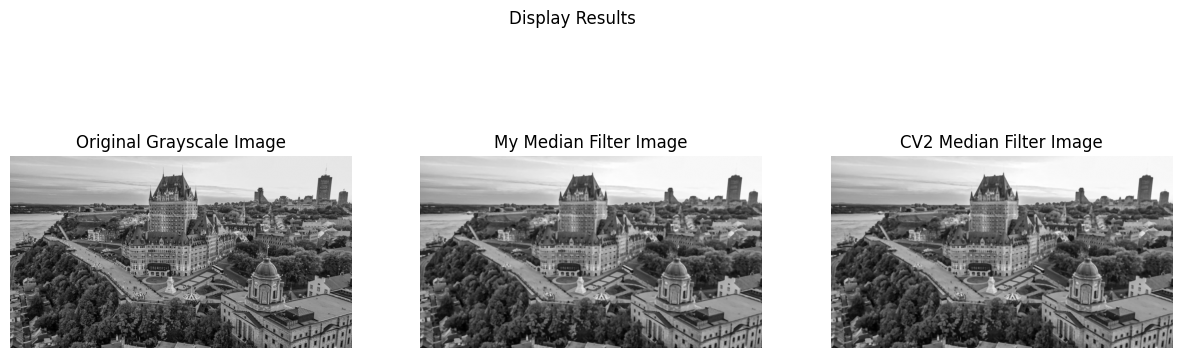

In [64]:
# Displaying the images

my_median_filter = median_filter(img_gray, 5)
cv2_median_filter = cv2.medianBlur(img_gray, 5)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Display Results")

# original grayscale image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

# my median filter image
axes[1].imshow(my_median_filter, cmap='gray')
axes[1].set_title("My Median Filter Image")
axes[1].axis("off")

# cv2 median filter image
axes[2].imshow(cv2_median_filter, cmap='gray')
axes[2].set_title("CV2 Median Filter Image")
axes[2].axis("off")

####2.4 Design Your Own Filter Kernel

##### Sharpening Filter:

In [65]:
# Implementation of Sharpening Filtering

def sharpening_filter(image):
  # found the 3x3 sharpening kernel from here: https://setosa.io/ev/image-kernels/
  kernel = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

  H, W = image.shape
  kernel_H, kernel_W = kernel.shape
  padding_H, padding_W = kernel_H // 2, kernel_W // 2

  # output array
  output = np.zeros_like(image).astype(np.float32)

  # zero padding -> image padding with zeros
  padded_image = np.pad(image, ((padding_H, padding_H), (padding_W, padding_W)), mode='constant')

  # convolution
  for i in range(H):
    for j in range(W):
      output[i, j] = np.sum(padded_image[i:i+kernel_H, j:j+kernel_W] * kernel)

  # clipping the values to [0, 255]
  output = np.round(np.clip(output, 0, 255)).astype(np.uint8)

  return output

(np.float64(-0.5), np.float64(1208.5), np.float64(679.5), np.float64(-0.5))

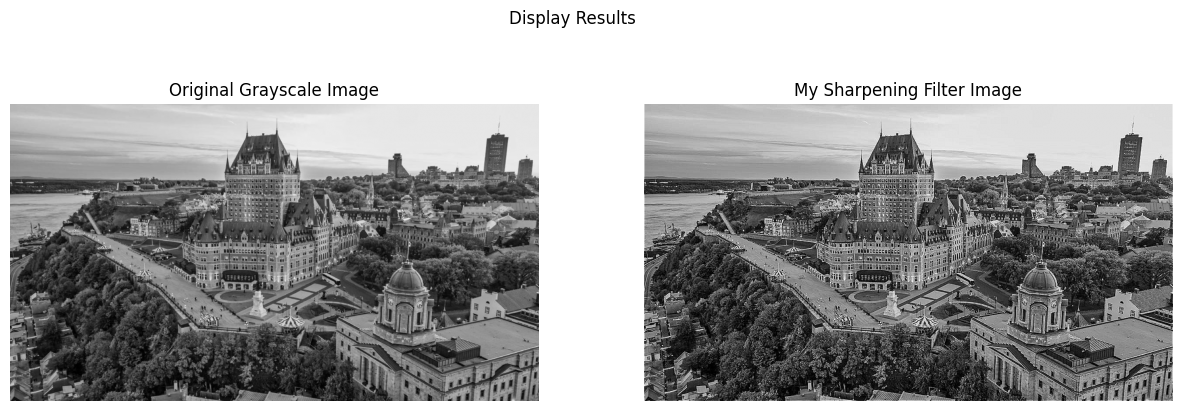

In [66]:
# Display the images

my_sharpening_filter = sharpening_filter(img_gray)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Display Results")

# original grayscale image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

# my sharpening filter image
axes[1].imshow(my_sharpening_filter, cmap='gray')
axes[1].set_title("My Sharpening Filter Image")
axes[1].axis("off")

###### Description:

When comparing the original grayscale image with the sharpened version, it is evident that the filter enhances image clarity and sharpening the image. Image edges, which correspond to changes in pixel values caused by a variety of scene structures or object boundaries, are amplified through convolution with the sharpening kernel. This intensification of local contrast makes edges more pronounced, resulting in a sharper image.

##### Laplacian Filter:

In [67]:
# Implementation of Laplacian Filter

def laplacian_filter(image):
  # found the 3x3 laplacian kernel from here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
  kernel = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

  # using the previously implemented convolution function
  output = convolution(image, kernel)

  return output


(np.float64(-0.5), np.float64(1208.5), np.float64(679.5), np.float64(-0.5))

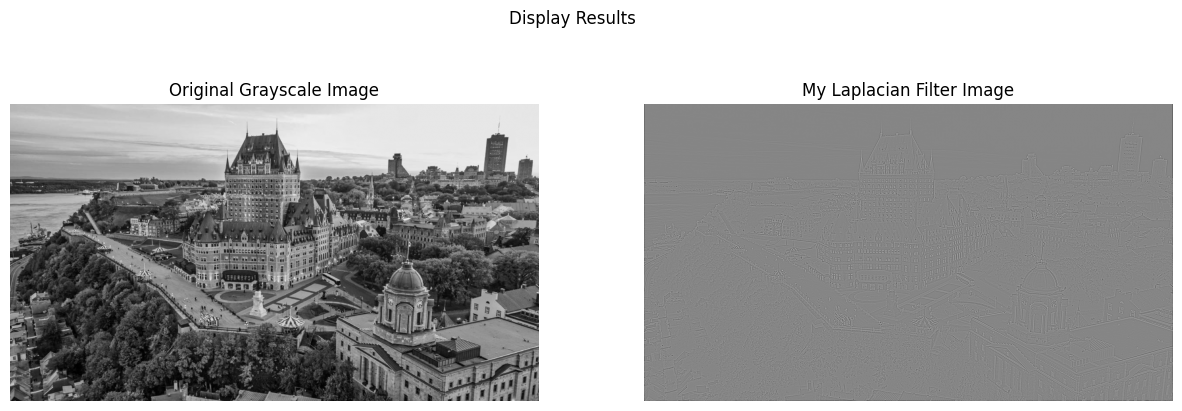

In [68]:
# Display the images

my_laplacian_filter = laplacian_filter(img_gray)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Display Results")

# original grayscale image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis("off")

# my sharpening filter image
axes[1].imshow(my_laplacian_filter, cmap='gray')
axes[1].set_title("My Laplacian Filter Image")
axes[1].axis("off")

###### Description:

Although it is not really visible with my image here, the Laplacian filter highlights regions of rapid intensity change, making object boundaries stand out as bright or dark contours. Flat areas of the image are suppressed, while edges appear clearly defined across all directions. This produces an outline-like effect that emphasizes the structural features of the scene or the image edges.

###3. Discussion

Filtering techniques such as Gaussian and Median filtering are among the earliest tools in image
processing. With the rise of machine learning and deep learning models that can achieve much more
advanced results, do you think classical filtering is still useful today? Why or why not? Provide
specific examples or scenarios where filtering could still play an important role.